Here used some LGB, XGB, GBM regression to predict the %Silica Concentrate, after ensemble,t he rmse is 0.214.
LGB has the potential for optimization.


In [10]:
#import some necessary librairies
# https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Loading and Inspecting data
The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab. Target is to predict the last column, which is the % of silica in the iron ore concentrate.


In [43]:
#Now let's import and put the train and test datasets in  pandas dataframe
path1 = '../input/quality-prediction-in-a-mining-process/'
path2 = '../input/defect_per_model/'
train = pd.read_csv(path1+'MiningProcess_Flotation_Plant_Database.csv',decimal=",",parse_dates=["date"],infer_datetime_format=True)

In [12]:
train.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,299.447794,299.917814,292.071485,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,2.572538,3.636579,30.217804,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,298.262566,298.068000,262.541000,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,299.805000,299.887120,299.477000,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,300.638000,301.791137,303.061000,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [13]:
print ("Size of train data : {}" .format(train.shape))

Size of train data : (737453, 24)


In [14]:
pd.set_option('display.max_columns', None)
train.head(100)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74000,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.9620,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74000,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.5600,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74000,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.9270,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74000,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.1650,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74000,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.9000,450.523,453.670,462.598,443.682,425.679,66.91,1.31
5,2017-03-10 01:00:00,55.2,16.98,3079.10,564.697,396.533,10.0705,1.74000,250.730,248.906,249.521,295.096,306.4,250.356,251.873,444.384,443.2690,460.449,439.920,451.588,433.539,425.458,66.91,1.31
6,2017-03-10 01:00:00,55.2,16.98,3127.79,566.467,392.900,10.0713,1.74000,250.313,252.202,249.082,295.096,306.4,250.950,253.477,446.185,444.5710,452.306,431.328,443.548,444.575,431.251,66.91,1.31
7,2017-03-10 01:00:00,55.2,16.98,3152.93,558.777,397.002,10.0722,1.74000,249.895,253.630,249.258,295.096,306.4,249.456,253.345,445.985,461.3410,461.640,442.067,441.730,461.770,449.679,66.91,1.31
8,2017-03-10 01:00:00,55.2,16.98,3147.27,556.030,394.307,10.0730,1.74000,250.137,251.104,248.774,295.096,306.4,248.577,250.884,446.686,478.3850,459.103,455.074,439.798,457.738,455.915,66.91,1.31
9,2017-03-10 01:00:00,55.2,16.98,3142.58,565.857,393.105,10.0738,1.74000,249.653,252.202,248.203,295.096,306.4,248.511,248.137,445.685,478.7790,460.665,457.225,453.236,449.898,455.750,66.91,1.31


In [15]:
train.info()
# d = train.date.value_counts()
# d.index
# i = 0
# for ind in d.index:
#     if '2017-03-13' in ind:
#         print(ind)
#         i+=1
# print('total unique timestamp',i)
# 2017-03-13 01:00:00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
date                            737453 non-null datetime64[ns]
% Iron Feed                     737453 non-null float64
% Silica Feed                   737453 non-null float64
Starch Flow                     737453 non-null float64
Amina Flow                      737453 non-null float64
Ore Pulp Flow                   737453 non-null float64
Ore Pulp pH                     737453 non-null float64
Ore Pulp Density                737453 non-null float64
Flotation Column 01 Air Flow    737453 non-null float64
Flotation Column 02 Air Flow    737453 non-null float64
Flotation Column 03 Air Flow    737453 non-null float64
Flotation Column 04 Air Flow    737453 non-null float64
Flotation Column 05 Air Flow    737453 non-null float64
Flotation Column 06 Air Flow    737453 non-null float64
Flotation Column 07 Air Flow    737453 non-null float64
Flotation Column 01 Level       737453 non

In [16]:
#corelation
corrmat = train.corr()
corrmat

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
% Iron Feed,1.000000,-0.971833,0.027981,-0.088148,0.160705,0.007451,-0.125518,-0.062379,-0.169430,-0.062207,-0.137413,0.121035,-0.042531,-0.016356,0.029499,0.020839,0.015191,0.016108,0.023288,0.003694,0.025723,0.055424,-0.077052
% Silica Feed,-0.971833,1.000000,-0.016073,0.078735,-0.150788,0.008014,0.104497,0.091757,0.182573,0.084197,0.160880,-0.130210,0.067565,0.045300,-0.038291,-0.036968,-0.022675,-0.034050,-0.043753,-0.019502,-0.046413,-0.044168,0.072724
Starch Flow,0.027981,-0.016073,1.000000,0.254748,0.042703,0.263020,0.226004,0.191131,0.186585,0.183288,0.093520,-0.088245,0.215780,0.194786,-0.294380,-0.278422,-0.301757,-0.012612,-0.055528,-0.071722,-0.038193,0.069657,-0.066394
Amina Flow,-0.088148,0.078735,0.254748,1.000000,0.212252,0.123690,0.655788,0.111321,0.122911,0.101957,0.016080,-0.044029,0.119966,0.079558,-0.268536,-0.234454,-0.286968,-0.180301,-0.211712,-0.197758,-0.168050,-0.110148,0.156701
Ore Pulp Flow,0.160705,-0.150788,0.042703,0.212252,1.000000,0.118376,0.012279,-0.137866,-0.118549,-0.140761,-0.155990,0.166989,-0.159255,-0.140914,-0.008579,-0.008049,-0.054351,-0.009784,0.002260,-0.016661,0.016585,0.083120,0.008222
Ore Pulp pH,0.007451,0.008014,0.263020,0.123690,0.118376,1.000000,0.115189,0.163073,0.144935,0.193372,0.150173,-0.139464,0.113741,0.174684,-0.165739,-0.153557,-0.140070,0.046371,0.013041,-0.075034,0.019021,0.192992,-0.147739
Ore Pulp Density,-0.125518,0.104497,0.226004,0.655788,0.012279,0.115189,1.000000,-0.005142,0.025794,-0.031673,-0.096839,0.044687,-0.030566,-0.052294,-0.111608,-0.093024,-0.149584,-0.087761,-0.140881,-0.099817,-0.086067,0.015580,0.046984
Flotation Column 01 Air Flow,-0.062379,0.091757,0.191131,0.111321,-0.137866,0.163073,-0.005142,1.000000,0.848277,0.954528,0.474586,-0.203700,0.662963,0.646768,-0.441573,-0.425758,-0.371791,-0.061940,-0.091386,-0.118992,-0.110726,0.098599,-0.219158
Flotation Column 02 Air Flow,-0.169430,0.182573,0.186585,0.122911,-0.118549,0.144935,0.025794,0.848277,1.000000,0.860438,0.434033,-0.181946,0.588519,0.578578,-0.432033,-0.422855,-0.365535,-0.074312,-0.110512,-0.117619,-0.112403,0.058744,-0.167398
Flotation Column 03 Air Flow,-0.062207,0.084197,0.183288,0.101957,-0.140761,0.193372,-0.031673,0.954528,0.860438,1.000000,0.490556,-0.225178,0.659506,0.649435,-0.440823,-0.420932,-0.364773,-0.046685,-0.063693,-0.100419,-0.085294,0.100136,-0.218891


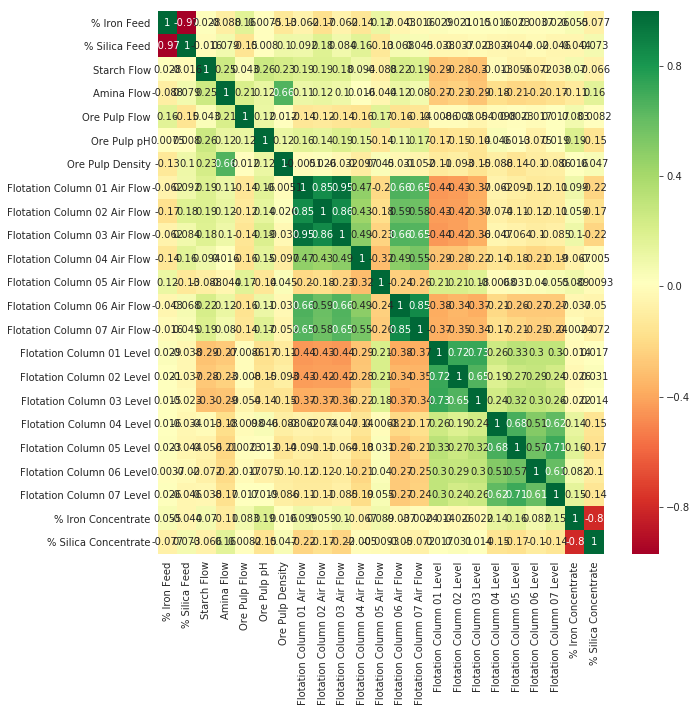

In [17]:
plt.figure(figsize=(10,10))
g = sns.heatmap(train.corr(),annot=True,cmap="RdYlGn")

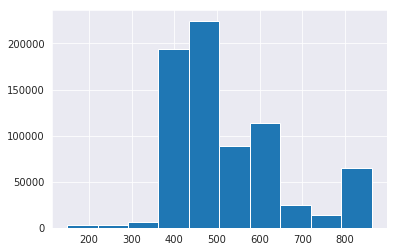

In [18]:
train['Flotation Column 01 Level'].hist()

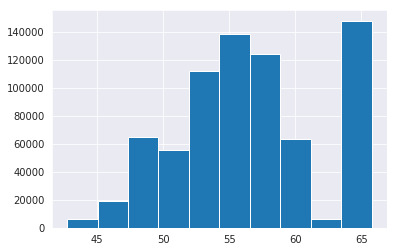

In [19]:
train['% Iron Feed'].hist()
# from scipy.stats import kstest
# for item in train.columns.drop('date'):
#     print(kstest(train[item],'norm'))
    

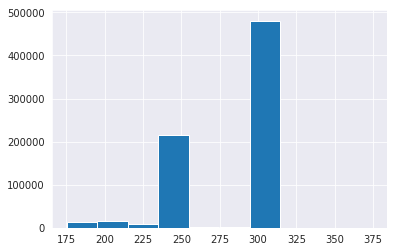

In [20]:
train['Flotation Column 01 Air Flow'].hist()

In [21]:
# train.skew(axis=0).sort_values(ascending=False)

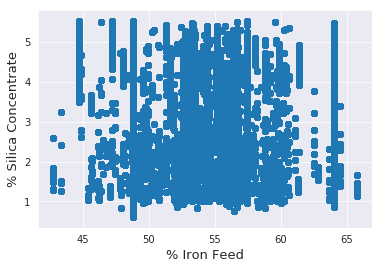

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = train['% Iron Feed'], y = train['% Silica Concentrate'])
plt.ylabel('% Silica Concentrate', fontsize=13)
plt.xlabel('% Iron Feed', fontsize=13)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 2.33 and sigma = 1.13



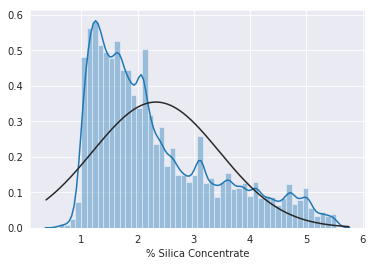

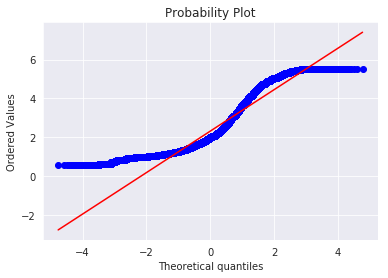

In [23]:
def check_skewness(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness('% Silica Concentrate')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 56.29 and sigma = 5.16



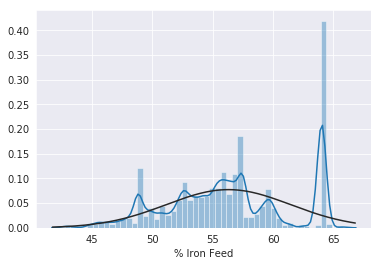

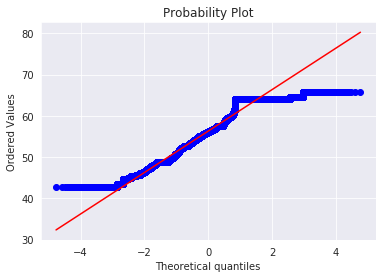

In [24]:
check_skewness('% Iron Feed')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 520.24 and sigma = 131.01



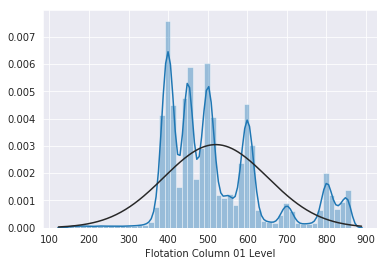

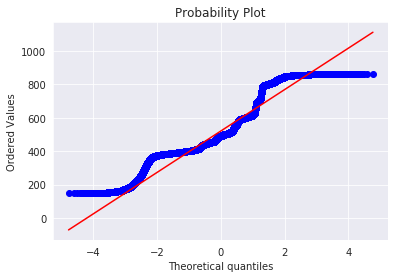

In [25]:
check_skewness('Flotation Column 01 Level')

**This distribution is positively skewed.** Notice that the black curve is more deviated towards the right. If you encounter that your predictive (response) variable is skewed, it is **recommended to fix the skewness** to make good decisions by the model.

## Okay, So how do I fix the skewness?
The best way to fix it is to perform a **log transform** of the same data, with the intent to reduce the skewness.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 1.15 and sigma = 0.31



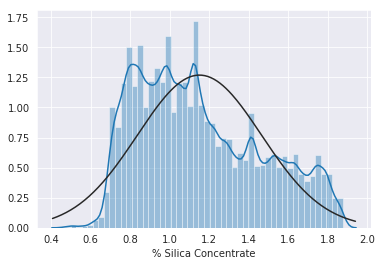

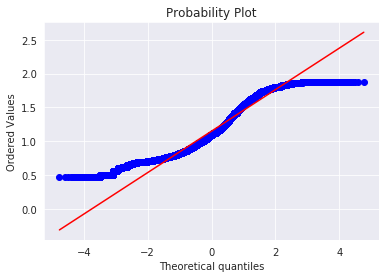

In [26]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["% Silica Concentrate"] = np.log1p(train["% Silica Concentrate"])

check_skewness('% Silica Concentrate')

After taking logarithm of the same data the curve seems to be normally distributed, although not perfectly normal, this is sufficient to fix the issues from a skewed dataset as we saw before.

**Important : If you log transform the response variable, it is required to also log transform feature variables that are skewed.**

## Box Cox Transformation of (highly) skewed features

When you are dealing with real-world data, you are going to deal with features that are heavily skewed. Transformation technique is useful to **stabilize variance**, make the data **more normal distribution-like**, improve the validity of measures of association.

The problem with the Box-Cox Transformation is **estimating lambda**. This value will depend on the existing data, and should be considered when performing cross validation on out of sample datasets.

In [27]:
# Check the skew of all numerical features
skewed_feats = train.drop('date',axis=1).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
Flotation Column 01 Level,0.983345
Flotation Column 03 Level,0.820678
Flotation Column 02 Level,0.745242
Flotation Column 05 Level,0.574594
% Silica Concentrate,0.503215
% Silica Feed,0.439711
Flotation Column 06 Level,0.402148
Flotation Column 07 Level,0.347455
Flotation Column 04 Level,0.099011
% Iron Feed,0.000415


In [28]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)

There are 23 skewed numerical features to Box Cox transform


In [29]:
train.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,5.533596,3.616508,15.511274,10.550216,9.689450,2.894474,1.088146,8.596881,8.633425,8.609315,8.987272,9.075493,8.606116,8.612119,10.047890,9.911118,9.864867,9.971214,10.283616,9.986958,10.388312,5.884925,0.636881
1,2017-03-10 01:00:00,5.533596,3.616508,15.516645,10.580270,9.699760,2.894577,1.088146,8.601498,8.608914,8.611918,8.987272,9.075493,8.605313,8.594867,10.017626,9.891559,9.910986,9.996524,10.253700,9.984455,10.262423,5.884925,0.636881
2,2017-03-10 01:00:00,5.533596,3.616508,15.537541,10.598937,9.713806,2.894681,1.088146,8.601699,8.584591,8.606918,8.987272,9.075493,8.616310,8.586402,10.014026,10.110295,9.920546,10.005427,10.192076,9.995077,10.054288,5.884925,0.636881
3,2017-03-10 01:00:00,5.533596,3.616508,15.541805,10.601716,9.703184,2.894798,1.088146,8.603306,8.644704,8.604510,8.987272,9.075493,8.607912,8.614511,10.020664,10.052093,9.967321,9.986064,10.123567,9.938086,9.880630,5.884925,0.636881
4,2017-03-10 01:00:00,5.533596,3.616508,15.526838,10.553604,9.717398,2.894901,1.088146,8.605915,8.623486,8.603105,8.987272,9.075493,8.603908,8.594263,10.020664,10.023196,10.010057,10.027440,10.076206,9.971910,9.869085,5.884925,0.636881


In [30]:
train.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,5.562579,3.276365,14.939890,10.169272,9.700341,2.854512,1.062264,8.853925,8.828698,8.862681,9.021495,9.025101,8.952343,8.942755,10.309470,10.321953,10.342460,9.784345,9.825715,9.847554,9.798699,5.832520,0.801409
std,0.166197,0.684717,2.008526,0.513998,0.060073,0.051676,0.030260,0.264156,0.265862,0.251946,0.020154,0.028494,0.245791,0.234643,0.612308,0.614292,0.716022,0.568133,0.488763,0.521785,0.504566,0.031882,0.161040
min,5.083406,0.892093,0.002024,8.526940,9.566489,2.715038,0.991312,7.818521,7.814160,7.830299,8.964170,8.916580,7.990134,7.944058,7.472279,8.219500,7.124785,7.649184,7.711438,7.564080,7.816539,5.745897,0.396615
25%,5.449590,2.741753,14.300235,9.904429,9.680475,2.823125,1.048218,8.606627,8.608231,8.611855,9.012270,9.010740,8.716154,8.660971,9.818060,9.961796,9.784424,9.437296,9.443866,9.449548,9.437924,5.813360,0.669123
50%,5.562063,3.325685,15.510062,10.294399,9.711236,2.859339,1.070027,9.020756,8.996195,9.015674,9.024365,9.025007,9.021797,9.018145,10.230724,10.251622,10.243246,9.788305,9.769110,9.863182,9.782867,5.837285,0.784059
75%,5.675986,3.828488,16.223180,10.530837,9.733973,2.890789,1.083183,9.027055,9.031281,9.028876,9.030875,9.039862,9.049725,9.040740,10.715294,10.721203,10.746396,10.197999,10.191649,10.234866,10.150389,5.855622,0.930217
max,5.853373,4.667576,18.097433,11.294761,9.827882,2.987966,1.135401,9.551099,9.564830,9.488610,9.071427,9.105063,9.531819,9.536278,11.712721,11.604408,11.790185,11.071762,11.053295,11.143194,10.990837,5.915214,1.144867


In [31]:
y = train['% Silica Concentrate']
X = train.iloc[:,1:-2]
X.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,5.533596,3.616508,15.511274,10.550216,9.689450,2.894474,1.088146,8.596881,8.633425,8.609315,8.987272,9.075493,8.606116,8.612119,10.047890,9.911118,9.864867,9.971214,10.283616,9.986958,10.388312
1,5.533596,3.616508,15.516645,10.580270,9.699760,2.894577,1.088146,8.601498,8.608914,8.611918,8.987272,9.075493,8.605313,8.594867,10.017626,9.891559,9.910986,9.996524,10.253700,9.984455,10.262423
2,5.533596,3.616508,15.537541,10.598937,9.713806,2.894681,1.088146,8.601699,8.584591,8.606918,8.987272,9.075493,8.616310,8.586402,10.014026,10.110295,9.920546,10.005427,10.192076,9.995077,10.054288
3,5.533596,3.616508,15.541805,10.601716,9.703184,2.894798,1.088146,8.603306,8.644704,8.604510,8.987272,9.075493,8.607912,8.614511,10.020664,10.052093,9.967321,9.986064,10.123567,9.938086,9.880630
4,5.533596,3.616508,15.526838,10.553604,9.717398,2.894901,1.088146,8.605915,8.623486,8.603105,8.987272,9.075493,8.603908,8.594263,10.020664,10.023196,10.010057,10.027440,10.076206,9.971910,9.869085


In [32]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=3)
# gc.collect()  
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(589962, 21)
(147491, 21)
(589962,)


## Lets apply Modelling

1. Importing Libraries

2. We will use models
 - Lasso
 - Ridge
 - ElasticNet
 - Gradient Boosting
 
3. Find the Cross Validation Score.

 

In [33]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

## Cross Validation
It's simple way to calculate error for evaluation. 

**KFold( )** splits the train/test data into k consecutive folds, we also have made shuffle attrib to True.

**cross_val_score ( )** evaluate a score by cross-validation.

In [34]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Modelling
Since in this dataset we have a large set of features. So to make our model avoid Overfitting and noisy we will use Regularization.
These model have Regularization parameter.

Regularization will reduce the magnitude of the coefficients.

## Ridge Regression
- It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
- It reduces the model complexity by coefficient shrinkage.
- It uses L2 regularization technique.

In [35]:
#http://sklearn.lzjqsdd.com/modules/linear_model.html#ridge-regression
#Ridge not sucessful
'''KRR = KernelRidge(alpha=0.5,kernel='polynomial,  degree=2, coef0=2.5)#
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''

'KRR = KernelRidge(alpha=0.5,kernel=\'polynomial,  degree=2, coef0=2.5)#\nscore = rmsle_cv(KRR)\nprint("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

## Lasso Regression
LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge.

In case of lasso, even at smaller alpha’s, our coefficients are reducing to absolute zeroes.
 Therefore, lasso selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.
 
- Lasso uses L1 regularization technique.
- Lasso is generally used when we have more number of features, because it automatically does feature selection.


In [36]:
'''lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''
# Lasso score: 0.1477 (0.0003)

'lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))\nscore = rmsle_cv(lasso)\nprint("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

## Elastic Net Regression

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both Ridge and Lasso by tuning the parameters.

In [37]:
'''ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''
# ElasticNet score: 0.1477 (0.0003)

'ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))\nscore = rmsle_cv(ENet)\nprint("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

## Gradient Boosting Regression
Refer [here](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)

In [38]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
'''GBoost = GradientBoostingRegressor(verbose=1, random_state =5)#n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''
# Gradient Boosting score: 0.1290 (0.0003)

'GBoost = GradientBoostingRegressor(verbose=1, random_state =5)#n_estimators=3000, learning_rate=0.05,\n#                                    max_depth=4, max_features=\'sqrt\',\n#                                    min_samples_leaf=15, min_samples_split=10, \n#                                    loss=\'huber\', random_state =5)\nscore = rmsle_cv(GBoost)\nprint("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

In [39]:
from joblib import dump, load

'''GBoostMd = GBoost.fit(X_train.values,y_train)
dump(GBoost, 'GBoost_fitted.joblib')'''

"GBoostMd = GBoost.fit(X_train.values,y_train)\ndump(GBoost, 'GBoost_fitted.joblib')"

In [40]:
import lightgbm as lgb
'''myLGB = lgb.LGBMRegressor(objective='regression')
myLGB.fit(X_train, y_train)
score = rmsle_cv(myLGB)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'''
# myLGB.booster_.save_model('lgbmodel.txt')
# Lasso score: 0.1033 (0.0003)

'myLGB = lgb.LGBMRegressor(objective=\'regression\')\nmyLGB.fit(X_train, y_train)\nscore = rmsle_cv(myLGB)\nprint("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))'

In [44]:
from xgboost import XGBRegressor
'''myXGB = XGBRegressor(n_estimators=1000, learning_rate=0.05,verbose=True)

# myXGB.fit(X_train, X_train, early_stopping_rounds=50, verbose=True)#eval_set=[(X_test, y_test)],
score = rmsle_cv(myXGB)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
#0.11
myXGB.fit(X_train, y_train)'''
# myXGB.save_model('myXGB_save.joblib')

'myXGB = XGBRegressor(n_estimators=1000, learning_rate=0.05,verbose=True)\n\n# myXGB.fit(X_train, X_train, early_stopping_rounds=50, verbose=True)#eval_set=[(X_test, y_test)],\nscore = rmsle_cv(myXGB)\nprint("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))\n#0.11\nmyXGB.fit(X_train, y_train)'

In [45]:
#following 3 not good
# LassoMd = lasso.fit(train.values,y_train)
# ENetMd = ENet.fit(train.values,y_train)
# KRRMd = KRR.fit(train.values,y_train)
myLGB = lgb.Booster(model_file=path2+'lgbmodel.txt')
myXGB = xgb.Booster({'nthread':-1}) # init model
myXGB.load_model(path2+'myXGB_save.joblib')      # load data

GBoost = load(path2+'GBoost_fitted.joblib')

## Mean of all model's prediction.
np.expm1 ( ) is used to calculate exp(x) - 1 for all elements in the array. 

In [46]:

Silica_pred = np.expm1(myLGB.predict(X_test))*0.6+np.expm1(myXGB.predict(xgb.DMatrix(X_test)))*0.3+np.expm1(GBoost.predict(X_test.values))*0.1

In [47]:
                                                                                                       
# from sklearn.metrics import mean_squared_error
print ("The RMSE of the model ensemble is %0.3f" %(mean_squared_error(y_test, Silica_pred)))
# The RMSE of the model ensemble is 0.214

The RMSE of the model ensemble is 0.214


In [48]:
print ("The RMSE of the lgb model  is %0.3f" %(mean_squared_error(y_test, np.expm1(myLGB.predict(X_test)))))
# The RMSE of the lgb model  is 0.215

The RMSE of the lgb model  is 0.215


With lgb optimzation, the rmse can be improved a little.